<a href="https://colab.research.google.com/github/preston-cell/vhs-intro-ai/blob/main/mnist_digit_recognition_cnn_dinh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the data for preprocessing (28x28 images become 1D vectors)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

x_train = x_train.astype("float32")/ 255.0
x_test = x_test.astype("float32") / 255.0


Reiterating the best model I came across in the previous assignment.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.4541 - loss: 1.7601 - val_accuracy: 0.8952 - val_loss: 0.3636
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8248 - loss: 0.5870 - val_accuracy: 0.9230 - val_loss: 0.2592
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8737 - loss: 0.4239 - val_accuracy: 0.9358 - val_loss: 0.2153
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8951 - loss: 0.3551 - val_accuracy: 0.9424 - val_loss: 0.1888
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9100 - loss: 0.3078 - val_accuracy: 0.9486 - val_loss: 0.1679
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9219 - loss: 0.2679 - val_accuracy: 0.9552 - val_loss: 0.1482
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9275 - loss: 0.2418 - val_accuracy: 0.9604 - val_loss: 0.1330
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9361 - loss: 0.2170 - val

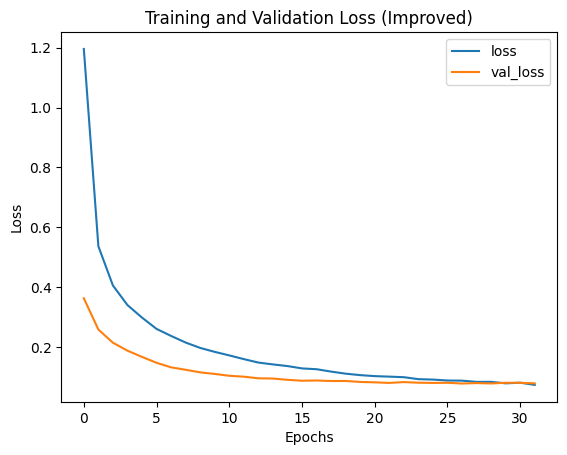

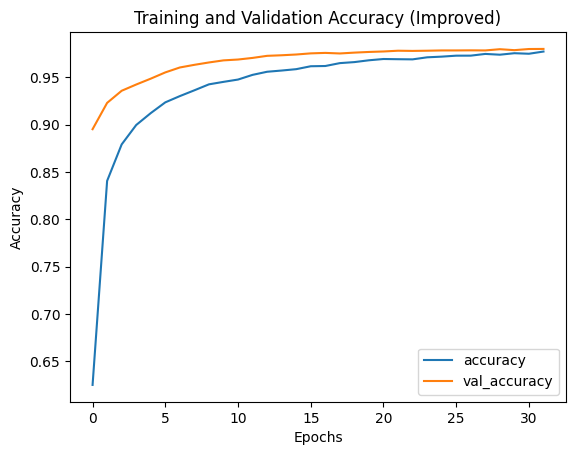

Max accuracy: 0.9800


In [ ]:
input_shape = [x_train.shape[1]]  # Input shape: 784 (28x28 flattened)

og_nn = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(10, activation='softmax')
])


# Compile the model
og_nn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0002),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early Stopping Callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history_improved = og_nn.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=128,  # even learger batch size for learning rate
    epochs=50,  # allowing for early stopping
    callbacks=[early_stopping]
)

# Plot training and validation metrics

history_df = pd.DataFrame(history_improved.history)

# Loss plot
history_df[['loss', 'val_loss']].plot(title='Training and Validation Loss (Improved)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Accuracy plot
history_df[['accuracy', 'val_accuracy']].plot(title='Training and Validation Accuracy (Improved)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
print(("Max accuracy: {:0.4f}").format(history_df['val_accuracy'].max()))


In [ ]:
og_nn.save_weights('mnist_nn.weights.h5', overwrite=True)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype("float32")/ 255.0
x_test = x_test.astype("float32") / 255.0

In [ ]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

input_shape = x_train.shape[1:]

(60000, 28, 28, 1)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.8610 - loss: 0.4447 - val_accuracy: 0.9801 - val_loss: 0.0622
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9722 - loss: 0.0871 - val_accuracy: 0.9864 - val_loss: 0.0392
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9795 - loss: 0.0660 - val_accuracy: 0.9880 - val_loss: 0.0355
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9817 - loss: 0.0570 - val_accuracy: 0.9896 - val_loss: 0.0310
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9850 - loss: 0.0472 - val_accuracy: 0.9901 - val_loss: 0.0290
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9864 - loss: 0.0442 - val_accuracy: 0.9914 - val_loss: 0.0266
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9873 - loss: 0.0386 - val_accuracy: 0.9910 - val_loss: 0.0267
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9884 -

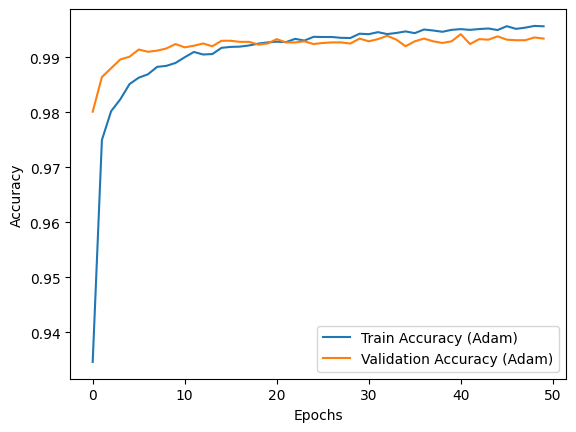

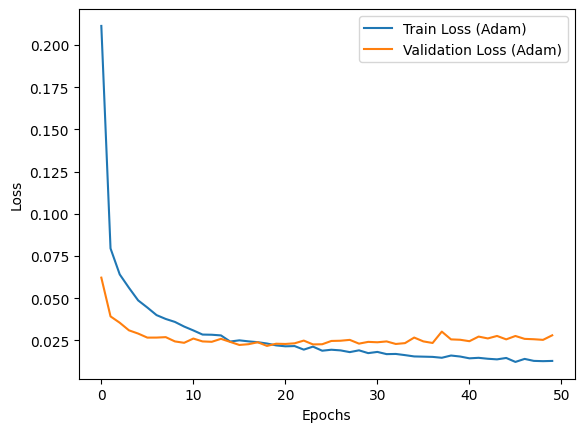

In [ ]:
# construct model as seen in tutorial
mnist_cnn = keras.Sequential([
    keras.Input(shape = input_shape),
    layers.Conv2D(32, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10, activation = 'softmax')
])

#compile model with adam but no slow learning rate
mnist_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# add early stopping at train for 50 epochs
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history_adam = mnist_cnn.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    batch_size=32
)

# Plot training and validation accuracy
plt.plot(history_adam.history['accuracy'], label='Train Accuracy (Adam)')
plt.plot(history_adam.history['val_accuracy'], label='Validation Accuracy (Adam)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history_adam.history['loss'], label='Train Loss (Adam)')
plt.plot(history_adam.history['val_loss'], label='Validation Loss (Adam)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
mnist_cnn.save_weights('mnist_cnn.weights.h5', overwrite=True)

**Data handling**

In the OG neural network with dense layers, it required a 1D input, so the 2D image (28x28) was flattened into a 1D vector (784). This was the straightforward way to feed the data into the dense layers, but we lost that relationship with the surrounding pixels.

In the CNN, however, the convolutional layers are designed to work with 2D data, so the image retains its original structure (28x28x1) with the extra dimension for the grayscale values. This allows the CNN to find relationships in featuers such as edges, textures, shapes by applying filters across the image. Once those relationships are found, then the data is flattened and ran through a dense layer to softmax some probabilities.

In short, NN's flatten the data because they treat each pixel as an independent feature. CNNs preserve the 2D structure to understand the spatial relationships, which is more computationally expensive but clearly worked better. There is essentially a dense layer network near the end of the CNN, but we are just zooming out and finding some important relationships before that data is entered into the dense layer.


**Parameter Sharing**

In the NN, each neuron in a dense layer has its own set of weights and biases, which are independent of other neurons. However, in a CNN, instead of having separate weights for every pixel, some amount of filters are shared across the entire image. For example, a 3x3 filter has only 9 weights and 1 bias, regardless of the input image size. If this filter is applied to a 28x28 image, the same 9 weights are reused for every 3x3 region in the image. Also, a filter that detects horizontal edges will work anywhere in the image, not just in one specific location.Given the same input, a dense layer would need 28x28 weights for the same thing.

**Training Time**

The training for the CNN took significantly longer than the NN. Each epoch in the NN was around 10-15 seconds while the CNN was 60-80 seconds. When looking at what goes on in each of these models, in the NN there is matrix multiplication: multiplying some matrix by a scalar value and adding a bias. This seems computationally cheap but since there are so many parameters it could also be computationally expensive. In the CNN, each time a single filter slides across the input there is a matrix multiplication and a dot product that is computed with a bias. This is done for however many filters for however many iterations per stride. The parameter sharing should offset some of the computation though. Even though the learning rate for the NN was set for lower, the batch size was much larger, meaning the NN goes through less batches in one epoch than the CNN. We can see this since the NN goes through 496 batches in one epoch while the CNN looks at 1875.

In [ ]:
og_nn.summary()
mnist_cnn.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_23               │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 738,144 (2.82 MB)

 Trainable params: 245,226 (957.91 KB)

 Non-trainable params: 2,464 (9.62 KB)

 Optimizer params: 490,454 (1.87 MB)

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,480 (408.13 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Number of parameters trained**

In NN, every neuron in a dense layer has its own set of weights and biases.
The first dense layer (dense_22) has 256 neurons, each connected to all 784 input pixels. This results in 256x784= 200,960 weights and 256 biases, totaling 201,216 parameters for this layer. These parameters are not shared across the input, meaning each pixel location is treated independently.

In the CNN, The first Conv2D layer (conv2d_8) has 32 filters of size 3x3. Each filter has 3x3x1=9 weights (shared across the image) and 1 bias, totaling
320 parameters.These filters are shared across the entire image, meaning the same set of weights is reused for every 3x3 region in the input. In the second conv layer, there is 64 3x3x32 filters each with 9 weights and one bias term or 296 parameters x 64 filters = 18,496 parameters. The final dense layer is the same calculation as the NN.

In short, In the NN, the large number of parameters is due to the dense layers, which treat each input feature independently. In the CNN, the smaller number of parameters is due to parameter sharing in convolutional layers, which reuse the same filters across the image.




**Notes from the previous NN Analysis**

In optimizing the previous NN model for image recognition, we noticed a strange behavior. There was a spiking in the validation loss while the validation accuracy was relatively good and smooth. Through analysis we made a guess as to why it was happening: for a singular grayscale unseen data, the model will generate 10 probabilities for what this input may be. If all of these probabilities are relatively similar, ~0.10, but one of those probabilities is slightly higher than the rest, and that probability happens to be the correct one, two things happen. First, the accuracy is unaffected because the model stil guessed the correct number. However, since the loss measures how much that probability differs from 1, the loss will be very high. In short, the model is not confident of this answer, but the accuracy is unaffected because it stil got it right. This is why the graph experiences sudden spikes in validation loss, while still having a smooth validation accuracy.